In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Read csv file into a pandas dataframe
data = pd.read_csv('ardd_fatalities_jan2022.csv',header=None)
data.drop(index=data.index[0], axis=0, inplace=True) # remove first row of data

# Print the first five rows of data
data.head()

F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2,3,10,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1,20225010,WA,1,2022,Sunday,2:50,Single,No,No,No,...,20,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekend,Night
2,20224003,SA,1,2022,Friday,21:10,Single,No,No,No,...,21,Remote Australia,South Australia - Outback,Lower Eyre Peninsula (DC),Local Road,No,No,17_to_25,Weekend,Night
3,20223017,Qld,1,2022,Sunday,18:00,Single,No,No,No,...,26,Inner Regional Australia,Ipswich,Somerset (R),Sub-arterial Road,No,No,26_to_39,Weekend,Night
4,20223013,Qld,1,2022,Friday,18:00,Single,No,No,No,...,22,Inner Regional Australia,Wide Bay,Fraser Coast (R),Local Road,No,No,17_to_25,Weekend,Night
5,20223005,Qld,1,2022,Friday,23:00,Single,No,No,No,...,44,Major Cities of Australia,Brisbane - South,Brisbane (C),Local Road,No,No,40_to_64,Weekend,Night


In [2]:
data2 = data.copy()

In [3]:
data2.columns = ['Crash_ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash_Type', 'Bus_Involvement', 'Heavy_Rigid_Truck_Involvement', 
'Articulated_Truck_Involvement', 'Speed_limit', 'Road_User', 'Gender', 'Age', 'National_Remoteness_Areas', 'SA4_Name_2016', 
                 'National_LGA_Name_2017', 'National_Road_Type', 'Christmas_Period', 'Easter_Period', 'Age_Group', 'Day_Of_Week', 'Time_of_Day']

In [4]:
print('Number of missing values:')
for col in data2.columns:
    print('\t%s: %d' % (col,data2[col].isna().sum()))

Number of missing values:
	Crash_ID: 0
	State: 0
	Month: 0
	Year: 0
	Dayweek: 0
	Time: 0
	Crash_Type: 0
	Bus_Involvement: 0
	Heavy_Rigid_Truck_Involvement: 0
	Articulated_Truck_Involvement: 0
	Speed_limit: 0
	Road_User: 0
	Gender: 0
	Age: 0
	National_Remoteness_Areas: 45872
	SA4_Name_2016: 45858
	National_LGA_Name_2017: 45854
	National_Road_Type: 45873
	Christmas_Period: 0
	Easter_Period: 0
	Age_Group: 0
	Day_Of_Week: 0
	Time_of_Day: 0


In [5]:
data2 = data2.replace(np.NaN, "?")
for col in data2.columns:
    print('\t%s: %d' % (col,data2[col].isna().sum()))

	Crash_ID: 0
	State: 0
	Month: 0
	Year: 0
	Dayweek: 0
	Time: 0
	Crash_Type: 0
	Bus_Involvement: 0
	Heavy_Rigid_Truck_Involvement: 0
	Articulated_Truck_Involvement: 0
	Speed_limit: 0
	Road_User: 0
	Gender: 0
	Age: 0
	National_Remoteness_Areas: 0
	SA4_Name_2016: 0
	National_LGA_Name_2017: 0
	National_Road_Type: 0
	Christmas_Period: 0
	Easter_Period: 0
	Age_Group: 0
	Day_Of_Week: 0
	Time_of_Day: 0


In [6]:
data2['Crash_ID'] = pd.to_numeric(data2['Crash_ID'], errors='coerce')
data2['Month'] = pd.to_numeric(data2['Month'], errors='coerce')
data2['Year'] = pd.to_numeric(data2['Year'], errors='coerce')
data2['Speed_limit'] = pd.to_numeric(data2['Speed_limit'], errors='coerce')
data2['Age'] = pd.to_numeric(data2['Age'], errors='coerce')
data2 = data2.replace(-9, np.NaN)

In [7]:
data2

,Crash_ID,State,Month,Year,Dayweek,Time,Crash_Type,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,...,Age,National_Remoteness_Areas,SA4_Name_2016,National_LGA_Name_2017,National_Road_Type,Christmas_Period,Easter_Period,Age_Group,Day_Of_Week,Time_of_Day
1,20225010,WA,1,2022,Sunday,2:50,Single,No,No,No,...,20.0,?,?,?,?,No,No,17_to_25,Weekend,Night
2,20224003,SA,1,2022,Friday,21:10,Single,No,No,No,...,21.0,Remote Australia,South Australia - Outback,Lower Eyre Peninsula (DC),Local Road,No,No,17_to_25,Weekend,Night
3,20223017,Qld,1,2022,Sunday,18:00,Single,No,No,No,...,26.0,Inner Regional Australia,Ipswich,Somerset (R),Sub-arterial Road,No,No,26_to_39,Weekend,Night
4,20223013,Qld,1,2022,Friday,18:00,Single,No,No,No,...,22.0,Inner Regional Australia,Wide Bay,Fraser Coast (R),Local Road,No,No,17_to_25,Weekend,Night
5,20223005,Qld,1,2022,Friday,23:00,Single,No,No,No,...,44.0,Major Cities of Australia,Brisbane - South,Brisbane (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53228,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,-9,No,...,5.0,?,?,?,?,No,No,0_to_16,Weekday,Day
53229,19895088,WA,1,1989,Monday,6:00,Single,No,-9,No,...,19.0,?,?,?,?,Yes,No,17_to_25,Weekday,Day
53230,19895088,WA,1,1989,Monday,6:00,Single,No,-9,No,...,17.0,?,?,?,?,Yes,No,17_to_25,Weekday,Day
53231,19895088,WA,1,1989,Monday,6:00,Single,No,-9,No,...,17.0,?,?,?,?,Yes,No,17_to_25,Weekday,Day


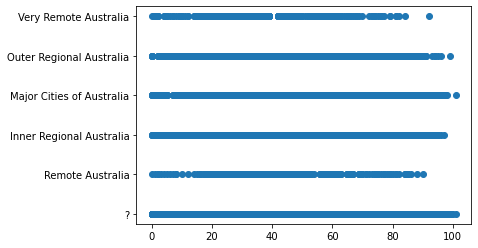

In [8]:
plt.scatter(data2['Age'],data2['National_Remoteness_Areas'])
plt.show()

In [9]:
data3 = data2.iloc[:,13:15]
data3

,Age,National_Remoteness_Areas
1,20.0,?
2,21.0,Remote Australia
3,26.0,Inner Regional Australia
4,22.0,Inner Regional Australia
5,44.0,Major Cities of Australia
...,...,...
53228,5.0,?
53229,19.0,?
53230,17.0,?
53231,17.0,?


In [10]:
data3 = data3.replace("Very Remote Australia", "1")
data3 = data3.replace("Remote Australia", "2")
data3 = data3.replace("Outer Regional Australia", "3")
data3 = data3.replace("Inner Regional Australia", "4")
data3 = data3.replace("Major Cities of Australia", "5")
data3 = data3.replace("?", np.NaN)
data3 = data3.dropna()

data3

,Age,National_Remoteness_Areas
2,21.0,2
3,26.0,4
4,22.0,4
5,44.0,5
6,29.0,3
...,...,...
9481,40.0,3
9487,46.0,5
9496,82.0,5
9504,84.0,2


Text(0, 0.5, 'SSE')

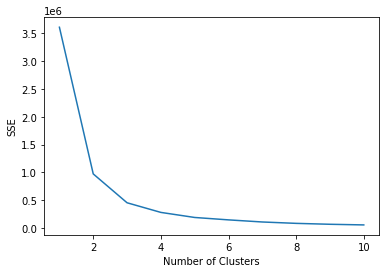

In [11]:
numClusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data3)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [12]:
X = data3

For n_clusters = 2 The average silhouette_score is : 0.6171131166078397


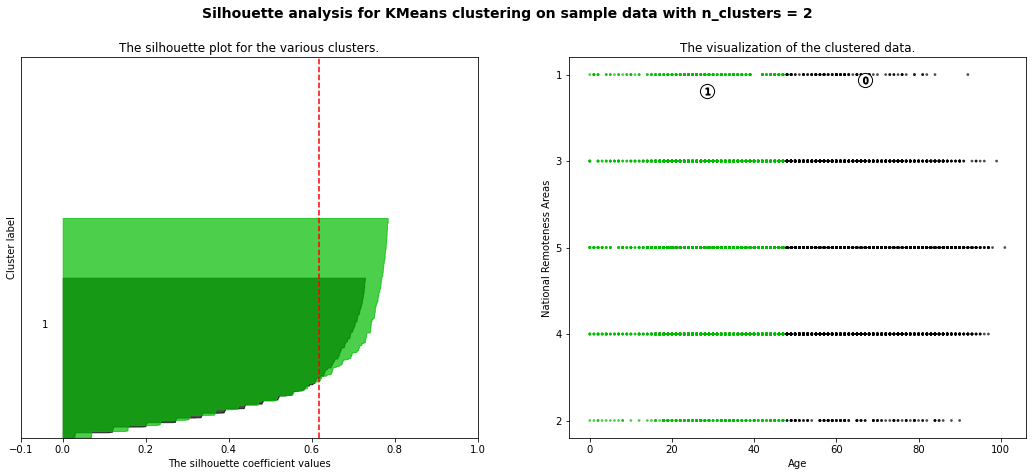

For n_clusters = 3 The average silhouette_score is : 0.5831674029732633


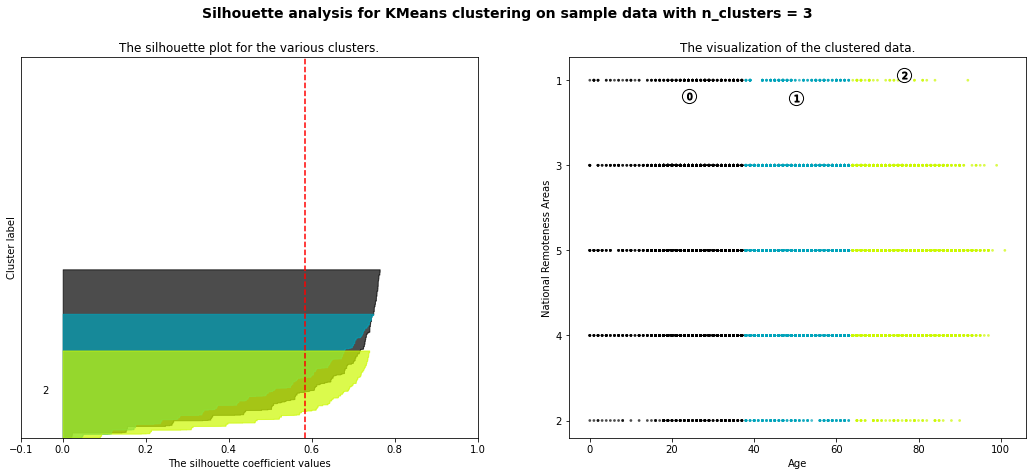

For n_clusters = 4 The average silhouette_score is : 0.5462450614584891


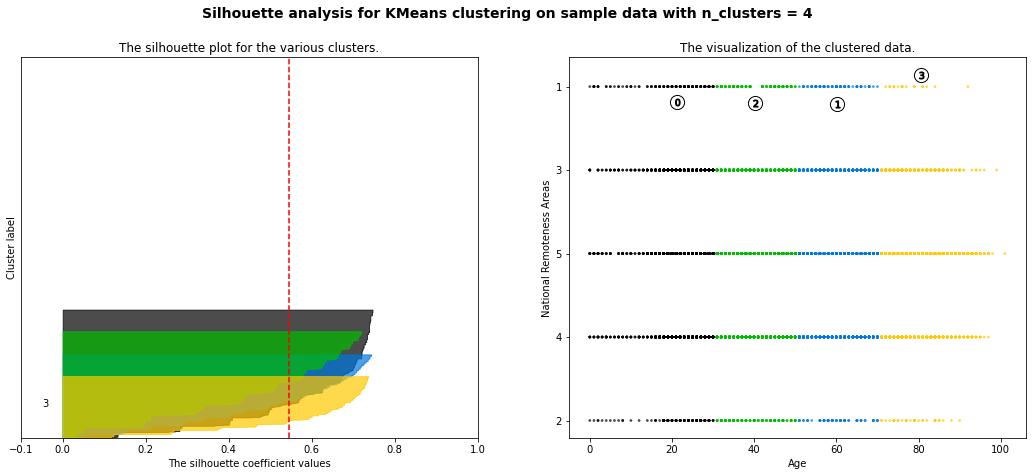

For n_clusters = 5 The average silhouette_score is : 0.5213734815051219


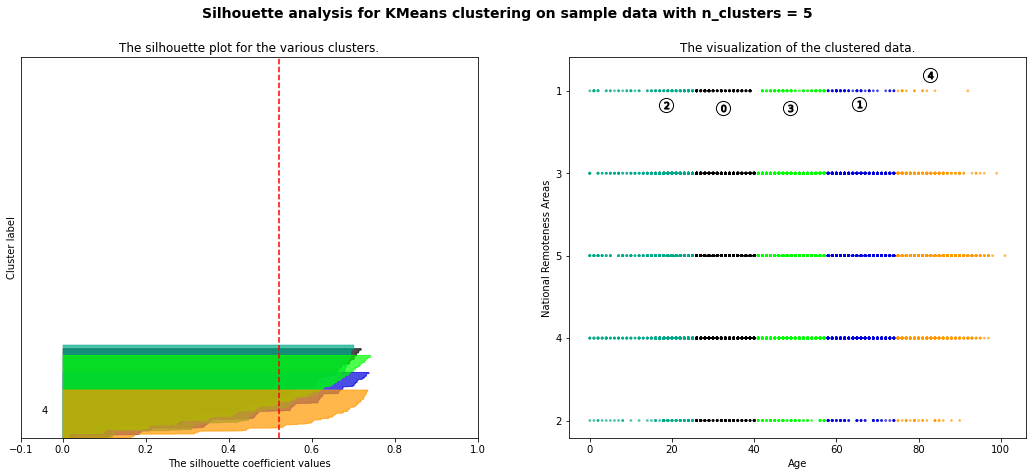

For n_clusters = 6 The average silhouette_score is : 0.501947972210461


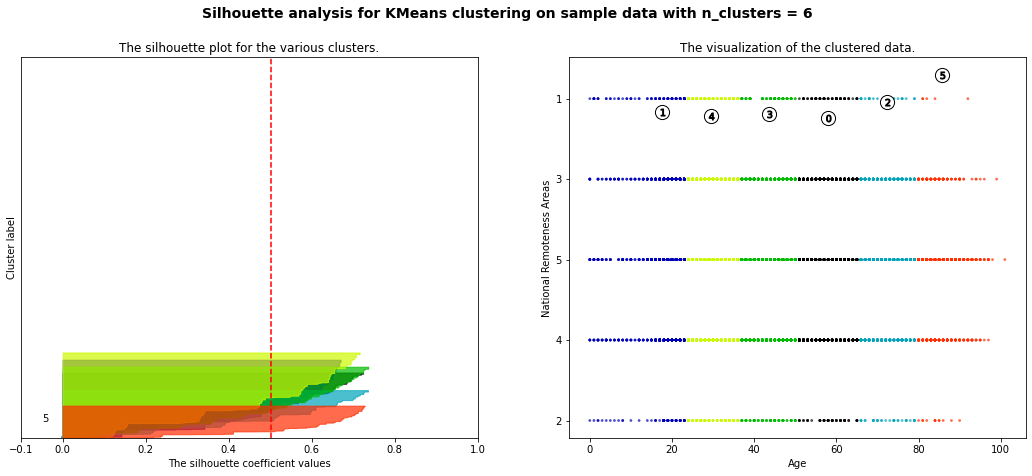

In [13]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]

    ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
# Compute the silhouette scores for each sample

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels
        == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
            )
        # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
    X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors,
    edgecolor="k"
    )
    # Labelling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Age")
    ax2.set_ylabel("National Remoteness Areas")
    plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
    )
    plt.show()


In [14]:
data3 = data2.iloc[:,14:16]
data3

,National_Remoteness_Areas,SA4_Name_2016
1,?,?
2,Remote Australia,South Australia - Outback
3,Inner Regional Australia,Ipswich
4,Inner Regional Australia,Wide Bay
5,Major Cities of Australia,Brisbane - South
...,...,...
53228,?,?
53229,?,?
53230,?,?
53231,?,?


In [15]:
data3 = data3.replace("?", np.NaN)
data3 = data3.dropna()

data3_national_remoteness_area = data3.iloc[:,0:1]
data3_SA4_Name_2016 = data3.iloc[:,1:2]
data4 = data3

In [16]:
data3_count = data3.value_counts()
data3_national_remoteness_area_count = data3_national_remoteness_area.value_counts()
data3_SA4_Name_2016_count = data3_SA4_Name_2016.value_counts()
data4 = data3

In [17]:
df = pd.get_dummies(data3_national_remoteness_area['National_Remoteness_Areas'])
data3_national_remoteness_area = pd.concat((df, data3_national_remoteness_area), axis=1)
data3_national_remoteness_area = data3_national_remoteness_area.drop(['National_Remoteness_Areas'], axis=1)
data3_national_remoteness_area

,Inner Regional Australia,Major Cities of Australia,Outer Regional Australia,Remote Australia,Very Remote Australia
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0
5,0,1,0,0,0
6,0,0,1,0,0
...,...,...,...,...,...
9481,0,0,1,0,0
9487,0,1,0,0,0
9496,0,1,0,0,0
9504,0,0,0,1,0


In [18]:
df = pd.get_dummies(data3_SA4_Name_2016['SA4_Name_2016'])
data3_SA4_Name_2016 = pd.concat((df, data3_SA4_Name_2016), axis=1)
data3_SA4_Name_2016 = data3_SA4_Name_2016.drop(['SA4_Name_2016'], axis=1)
data3_SA4_Name_2016

,Adelaide - Central and Hills,Adelaide - North,Adelaide - South,Adelaide - West,Australian Capital Territory,Ballarat,Barossa - Yorke - Mid North,Bendigo,Brisbane - East,Brisbane - North,...,Sydney - South West,Sydney - Sutherland,Toowoomba,Townsville,Warrnambool and South West,West and North West,Western Australia - Outback (North),Western Australia - Outback (South),Western Australia - Wheat Belt,Wide Bay
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9496,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
df = pd.get_dummies(data4['National_Remoteness_Areas'])
data4 = pd.concat((df, data4), axis=1)
data4 = data4.drop(['National_Remoteness_Areas'], axis=1)
df = pd.get_dummies(data4['SA4_Name_2016'])
data4 = pd.concat((df, data4), axis=1)
data4 = data4.drop(['SA4_Name_2016'], axis=1)
data4

,Adelaide - Central and Hills,Adelaide - North,Adelaide - South,Adelaide - West,Australian Capital Territory,Ballarat,Barossa - Yorke - Mid North,Bendigo,Brisbane - East,Brisbane - North,...,West and North West,Western Australia - Outback (North),Western Australia - Outback (South),Western Australia - Wheat Belt,Wide Bay,Inner Regional Australia,Major Cities of Australia,Outer Regional Australia,Remote Australia,Very Remote Australia
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9496,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9504,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
SA4_Name_2016_index  = pd.Series(['South Australia - Outback', 'Ipswich', 'Wide Bay', 'Brisbane - South',
                                   'Townsville', 'New England and North West', 'Hume', 'Melbourne - West',
                                   'Melbourne - South East', 'Queensland - Outback', 'Sunshine Coast',
                                   'Warrnambool and South West', 'North West', 'Australian Capital Territory',
                                   'Mid North Coast', 'Sydney - Baulkham Hills and Hawkesbury', 'Sydney - Blacktown',
                                   'Sydney - Outer South West', 'Sydney - Outer West and Blue Mountains',
                                   'Darling Downs - Maranoa', 'Melbourne - North West', 'Southern Highlands and Shoalhaven',
                                   'Capital Region', 'Ballarat', 'Richmond - Tweed', 'Launceston and North East',
                                   'Central West', 'Coffs Harbour - Grafton', 'Cairns', 'Adelaide - North',
                                   'Latrobe - Gippsland', 'Shepparton', 'Hunter Valley exc Newcastle',
                                   'Northern Territory - Outback', 'Adelaide - Central and Hills', 
                                   'Far West and Orana', 'Geelong', 'Moreton Bay - North', 'Melbourne - Outer East',
                                   'Barossa - Yorke - Mid North', 'Newcastle and Lake Macquarie',
                                   'Sydney - Inner South West', 'Sydney - South West', 'Bendigo', 
                                   'Hobart', 'Melbourne - Inner East', 'Melbourne - Inner', 'South East',
                                   'Gold Coast', 'Riverina', 'Logan - Beaudesert', 'West and North West',
                                   'Sydney - North Sydney and Hornsby', 'South Australia - South East',
                                   'Murray', 'Illawarra', 'Melbourne - North East', 'Toowoomba',
                                   'Brisbane - West', 'Darwin' ,'Sydney - City and Inner South',
                                   'Melbourne - Inner South', 'Sydney - Sutherland', 'Sydney - Parramatta',
                                   'Mornington Peninsula', 'Moreton Bay - South', 'Mackay - Isaac - Whitsunday',
                                   'Central Queensland', 'Adelaide - South', 'Sydney - Ryde', 'Central Coast',
                                   'Brisbane - East', 'Adelaide - West', 'Sydney - Inner West',
                                   'Brisbane - North', 'Sydney - Northern Beaches', 'Perth - North East',
                                   'Bunbury', 'Perth - South West', 'Western Australia - Outback (South)',
                                   'Perth - North West', 'Western Australia - Wheat Belt', 'Sydney - Eastern Suburbs',
                                   'Mandurah', 'Western Australia - Outback (North)', 'Perth - South East',
                                   'Perth - Inner', 'Brisbane Inner City'], 
                                  
                                 index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                                        '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                                        '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                                        '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
                                        '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
                                        '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
                                        '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
                                        '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
                                        '81', '82', '83', '84', '85', '86', '87', '88'
                                        ])

In [21]:
national_remoteness_index = pd.Series(['Very Remote Australia', 'Remote Australia', 'Outer Regional Australia', 
                                      'Inner Regional Australia', 'Major Cities of Australia'], index=['1', '2', '3', '4', '5'])

<AxesSubplot:xlabel='SA4_Name_2016'>

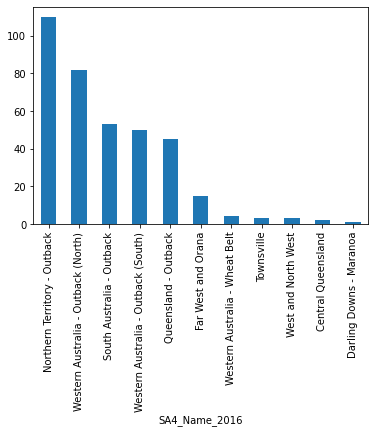

In [22]:
df = data3.groupby('National_Remoteness_Areas')['SA4_Name_2016'].value_counts().loc[national_remoteness_index['1']]
df.plot.bar()

<AxesSubplot:xlabel='SA4_Name_2016'>

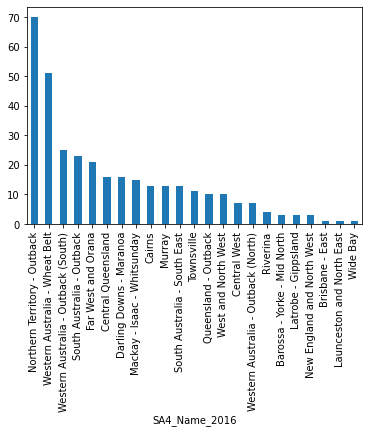

In [23]:
df = data3.groupby('National_Remoteness_Areas')['SA4_Name_2016'].value_counts().loc[national_remoteness_index['2']]
df.plot.bar()

<AxesSubplot:xlabel='SA4_Name_2016'>

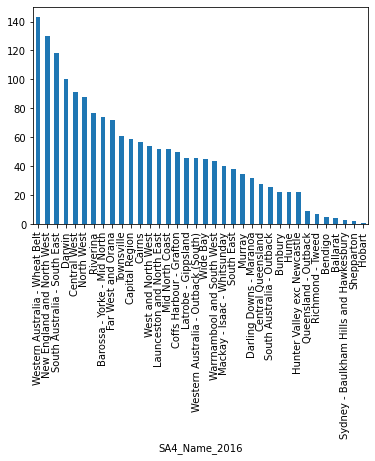

In [24]:
df = data3.groupby('National_Remoteness_Areas')['SA4_Name_2016'].value_counts().loc[national_remoteness_index['3']]
df.plot.bar()

<AxesSubplot:xlabel='SA4_Name_2016'>

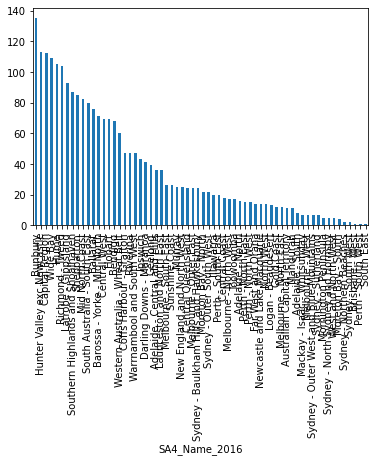

In [25]:
df = data3.groupby('National_Remoteness_Areas')['SA4_Name_2016'].value_counts().loc[national_remoteness_index['4']]
df.plot.bar()

<AxesSubplot:xlabel='SA4_Name_2016'>

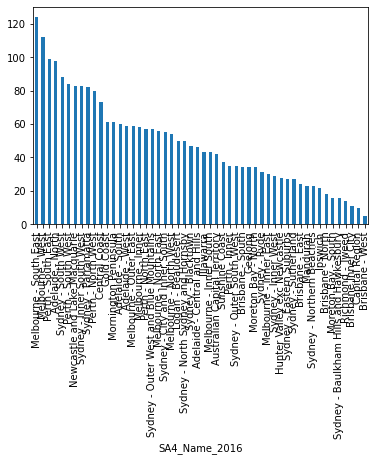

In [26]:
df = data3.groupby('National_Remoteness_Areas')['SA4_Name_2016'].value_counts().loc[national_remoteness_index['5']]
df.plot.bar()

In [27]:
data3_count

National_Remoteness_Areas  SA4_Name_2016                 
Outer Regional Australia   Western Australia - Wheat Belt    143
Inner Regional Australia   Bunbury                           135
Outer Regional Australia   New England and North West        130
Major Cities of Australia  Melbourne - South East            124
Outer Regional Australia   South Australia - South East      118
                                                            ... 
Inner Regional Australia   Perth - South West                  1
                           South East                          1
                           Brisbane - West                     1
Remote Australia           Brisbane - East                     1
Very Remote Australia      Darling Downs - Maranoa             1
Length: 186, dtype: int64

In [28]:
data3_national_remoteness_area_count

National_Remoteness_Areas
Major Cities of Australia    2527
Inner Regional Australia     2373
Outer Regional Australia     1755
Very Remote Australia         368
Remote Australia              337
dtype: int64

In [29]:
data3_SA4_Name_2016_count

SA4_Name_2016                 
Western Australia - Wheat Belt    258
South Australia - South East      211
Capital Region                    181
Northern Territory - Outback      180
Central West                      167
                                 ... 
Moreton Bay - South                20
Brisbane - North                   18
Toowoomba                          17
Brisbane Inner City                11
Brisbane - West                     6
Length: 88, dtype: int64

<AxesSubplot:xlabel='National_Remoteness_Areas,SA4_Name_2016'>

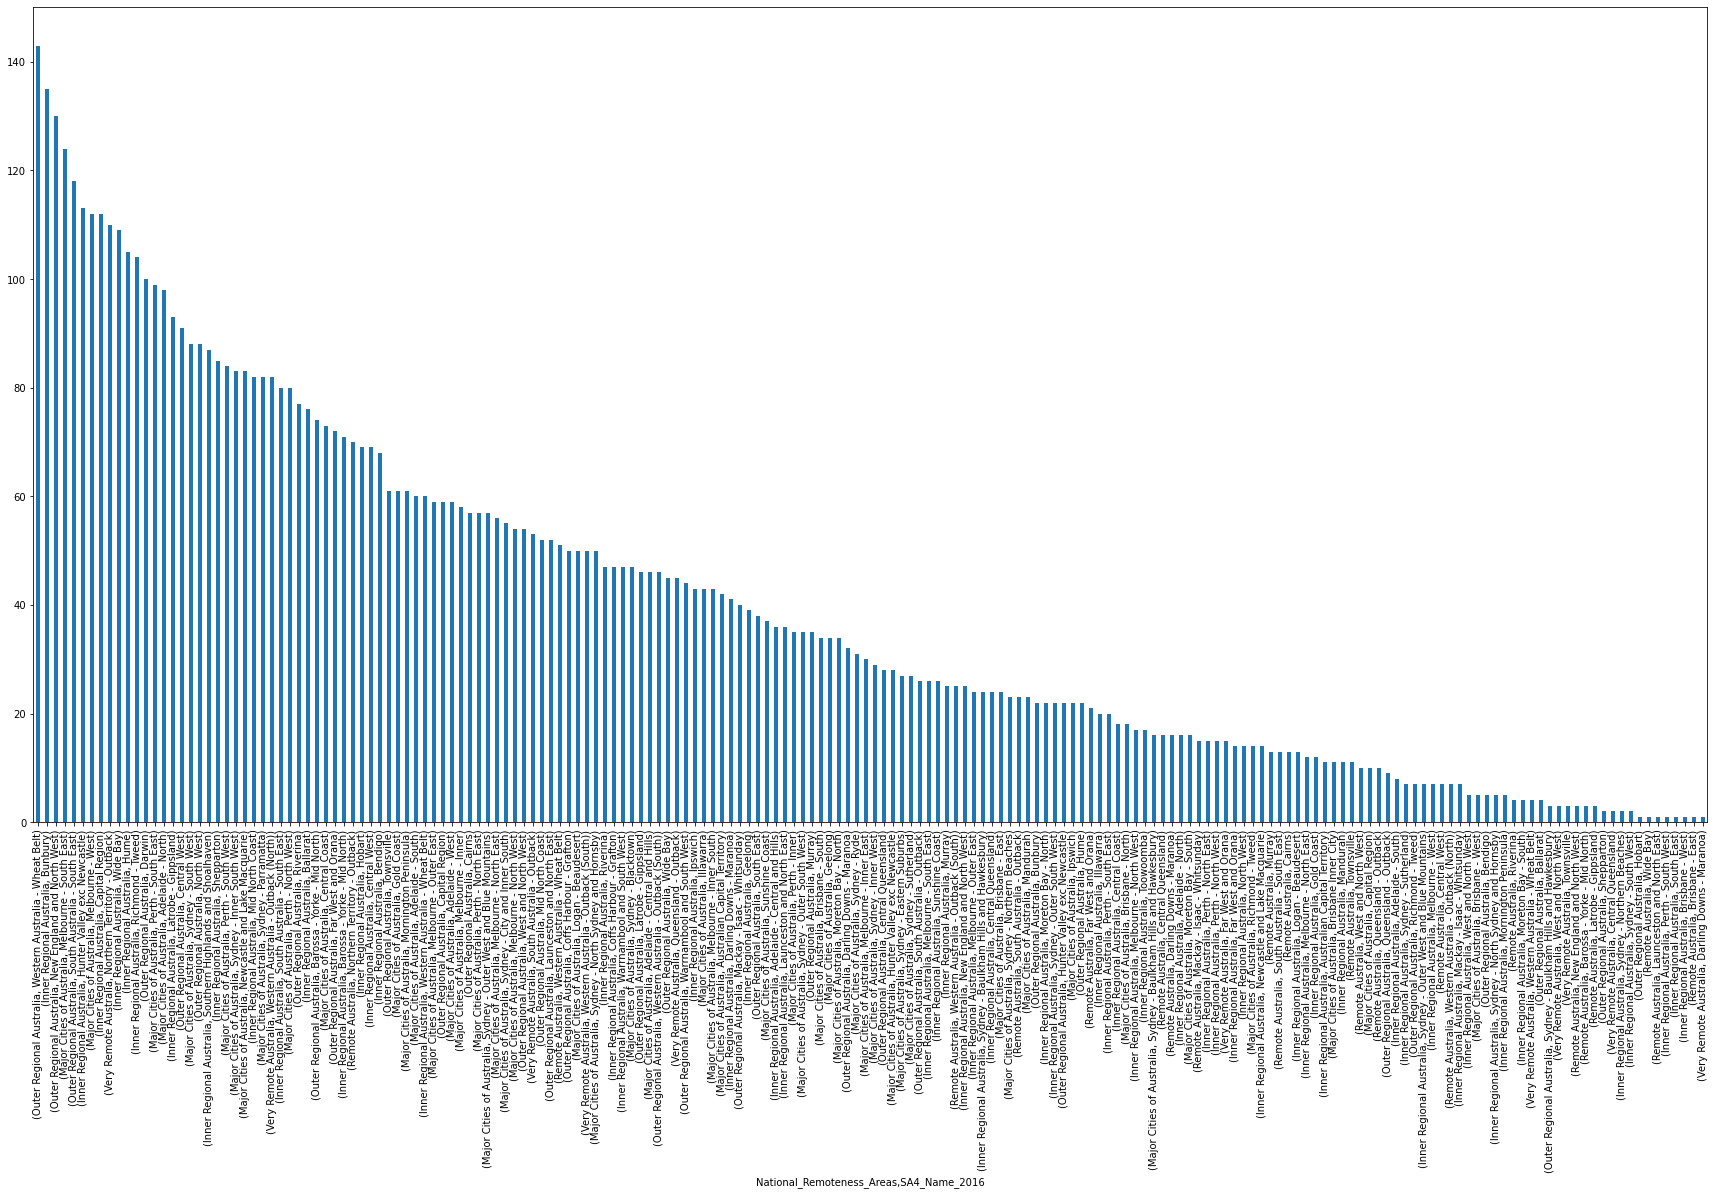

In [30]:
data3_count.plot.bar(figsize=(30,15))

<AxesSubplot:xlabel='National_Remoteness_Areas'>

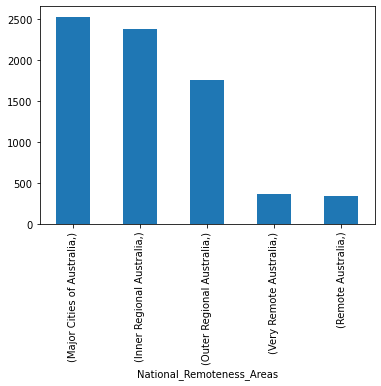

In [31]:
data3_national_remoteness_area_count.plot.bar()

<AxesSubplot:xlabel='SA4_Name_2016'>

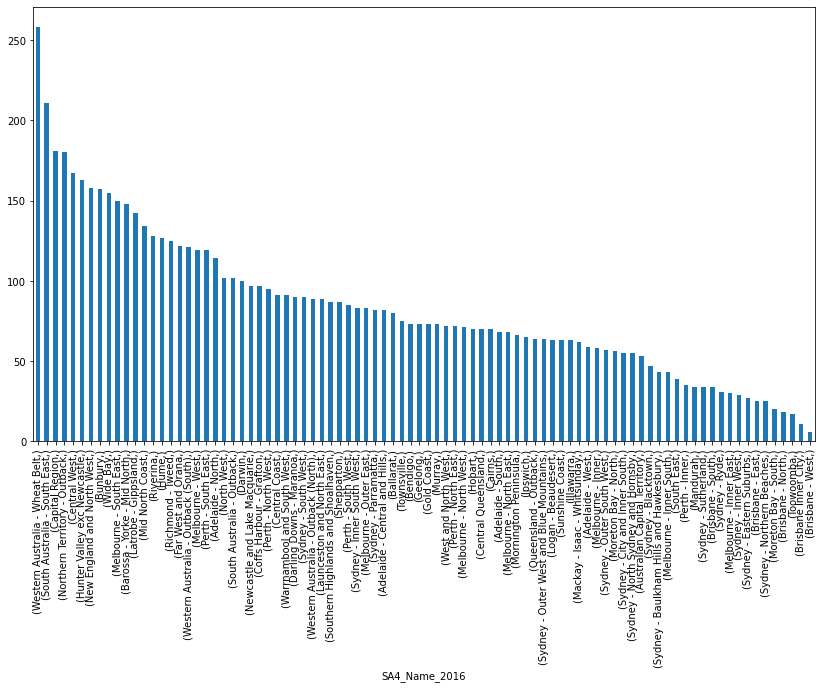

In [32]:
data3_SA4_Name_2016_count.plot.bar(figsize=(14,8))

In [33]:
data3 = data2.iloc[:,[3,13]]
data3 = data3.replace("?", np.NaN)
data3 = data3.dropna()
data4 = data2.iloc[:,13:14]

In [34]:
data4

,Age
1,20.0
2,21.0
3,26.0
4,22.0
5,44.0
...,...
53228,5.0
53229,19.0
53230,17.0
53231,17.0


In [35]:
data4_count = data4.value_counts()

<AxesSubplot:xlabel='Age'>

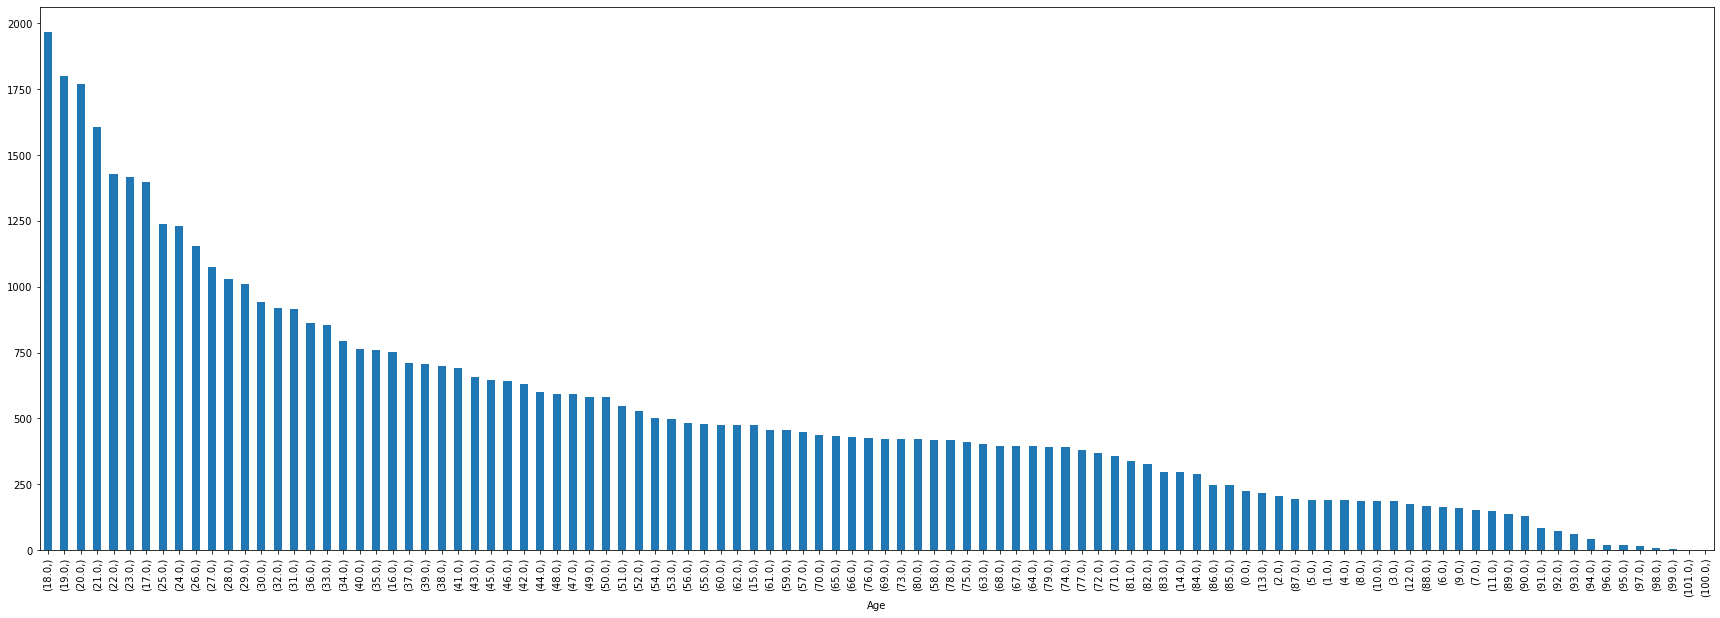

In [36]:
data4_count.plot.bar(figsize=(30,10))

Text(0, 0.5, 'SSE')

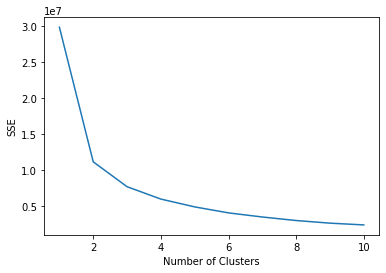

In [37]:
numClusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data3)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [38]:
X = data3

For n_clusters = 2 The average silhouette_score is : 0.5309801979628548


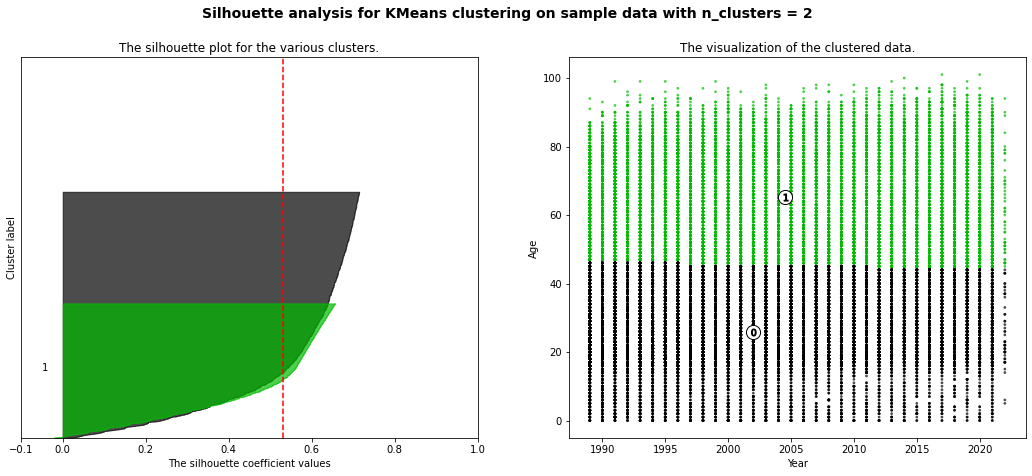

For n_clusters = 3 The average silhouette_score is : 0.4088341713937598


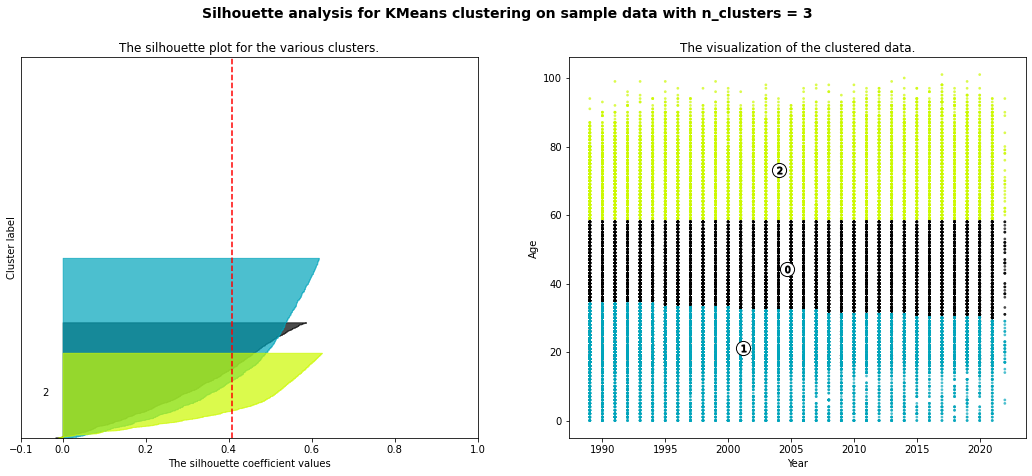

For n_clusters = 4 The average silhouette_score is : 0.38258095316132373


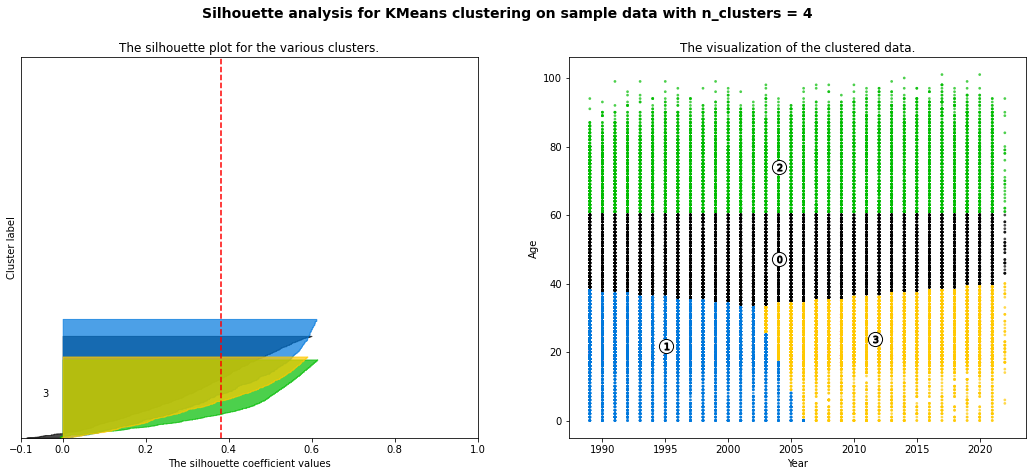

For n_clusters = 5 The average silhouette_score is : 0.3831242069809346


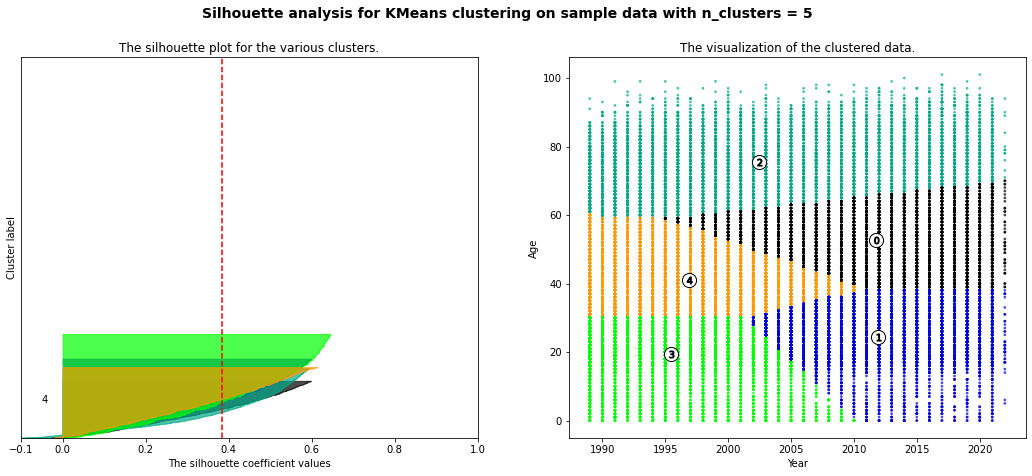

For n_clusters = 6 The average silhouette_score is : 0.3806362472261676


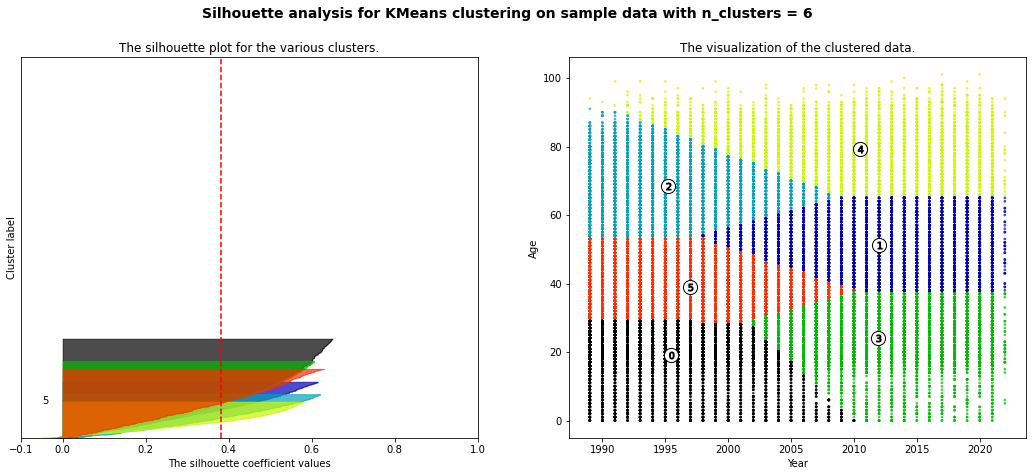

In [39]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]

    ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
# Compute the silhouette scores for each sample

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels
        == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
            )
        # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
    X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors,
    edgecolor="k"
    )
    # Labelling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Year")
    ax2.set_ylabel("Age")
    plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
    )
    plt.show()


In [40]:
data3 = data2.iloc[:,[10,13]]
data3 = data3.replace("?", np.NaN)
data3 = data3.dropna()

Text(0, 0.5, 'SSE')

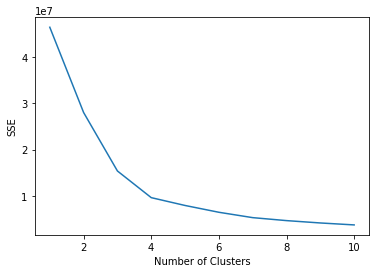

In [41]:
numClusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data3)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [42]:
X = data3

For n_clusters = 2 The average silhouette_score is : 0.4118269106174184


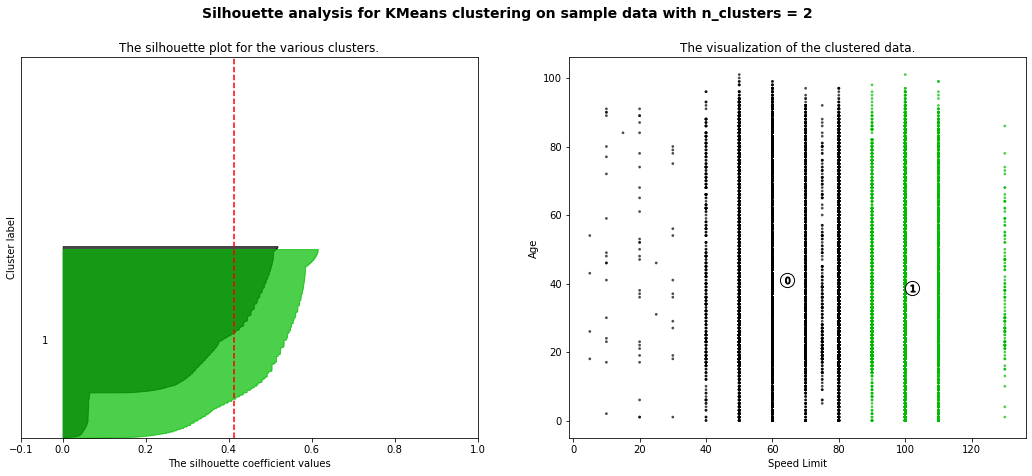

For n_clusters = 3 The average silhouette_score is : 0.4709363843295329


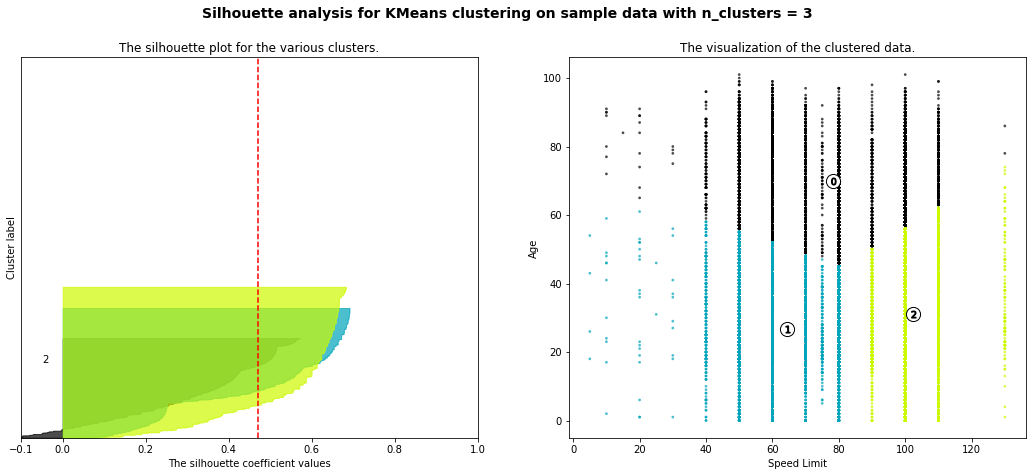

For n_clusters = 4 The average silhouette_score is : 0.49989564258931407


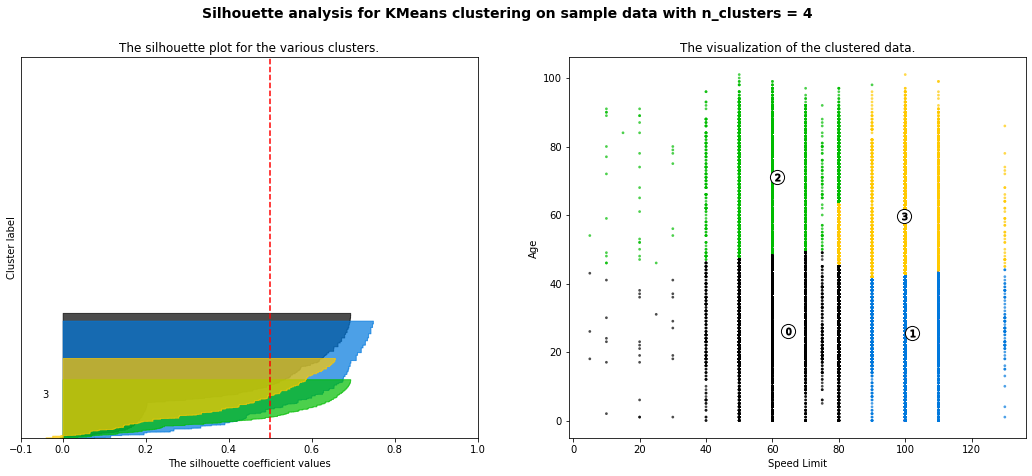

For n_clusters = 5 The average silhouette_score is : 0.47498644796295536


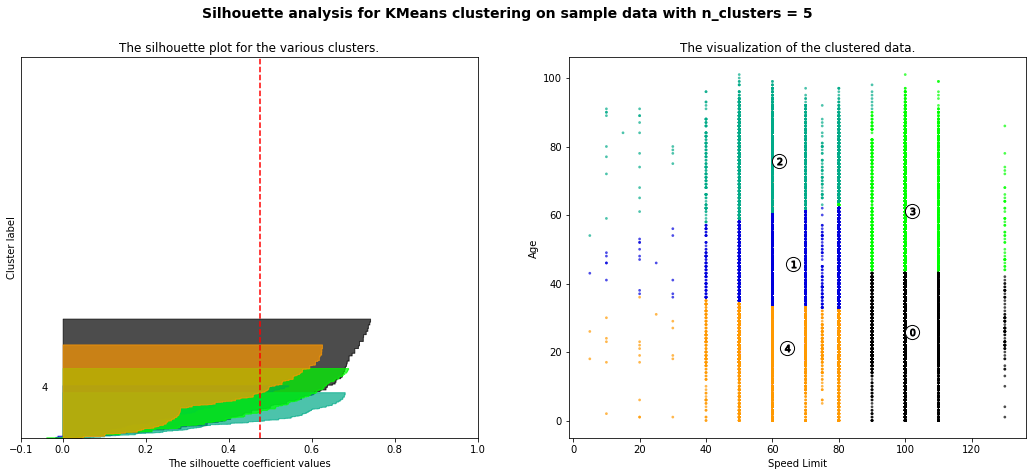

For n_clusters = 6 The average silhouette_score is : 0.4436422270383743


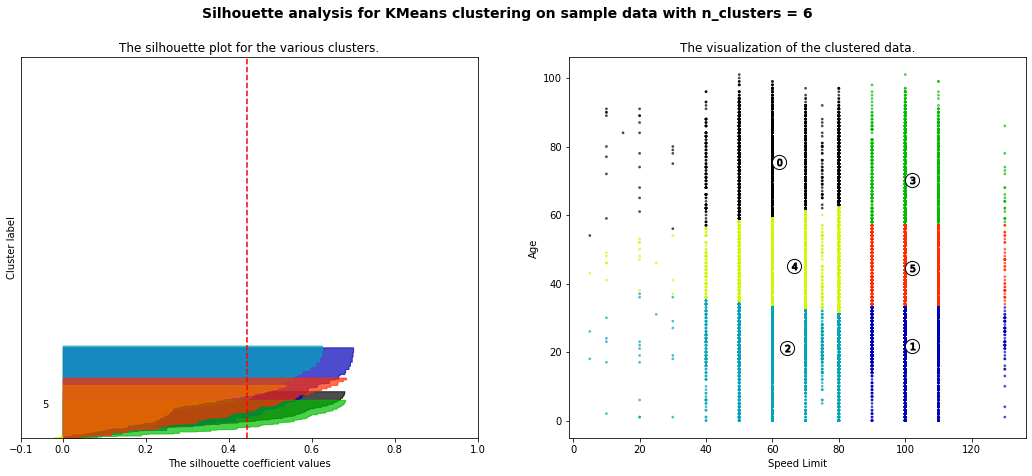

In [43]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]

    ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
# Compute the silhouette scores for each sample

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels
        == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
            )
        # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
    X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors,
    edgecolor="k"
    )
    # Labelling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Speed Limit")
    ax2.set_ylabel("Age")
    plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
    )
    plt.show()
